In [1]:
import numpy as np
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('USDTWD.db')
command = "SELECT * FROM USDTWD"
usdtwd = pd.read_sql(command,conn,index_col='Date')
usdtwd.index = pd.to_datetime(usdtwd.index,format='%Y%m%d')
usdtwd

,USDTWD
Date,
2000-01-04,30.602
2000-01-05,30.800
2000-01-06,30.854
2000-01-07,30.860
2000-01-10,30.835
...,...
2025-01-09,32.940
2025-01-10,32.964
2025-01-13,33.119


In [3]:
conn = sqlite3.connect("USStock_index.db")
command = "SELECT Date,close_dj,close_nas,close_sox,close_sp5 FROM Stock_index"
USStock_index = pd.read_sql(command,conn,index_col = "Date")
USStock_index.index = pd.to_datetime(USStock_index.index,format="%Y%m%d")
USStock_index

,close_dj,close_nas,close_sox,close_sp5
Date,,,,
2003-11-01,9782.46,1960.26,529.3,1058.20
2003-12-01,10453.92,2003.37,508.1,1111.92
2004-01-01,10488.07,2066.15,514.4,1131.13
2004-02-01,10583.92,2029.82,502.3,1144.94
2004-03-01,10357.70,1994.22,487.1,1126.21
...,...,...,...,...
2024-06-01,39118.86,17732.60,5472.3,5460.48
2024-07-01,40842.79,17599.40,5233.2,5522.30
2024-08-01,41563.08,17713.62,5158.8,5648.40


In [4]:
conn = sqlite3.connect("US10Y.db")
command = "SELECT * FROM US10Y"
US10Y = pd.read_sql(command,conn,index_col="Date")
US10Y.index = pd.to_datetime(US10Y.index,format="%Y%m%d")
US10Y.rename(columns={"US10Y_Treasury_Yield":"Yield"},inplace=True)
US10Y

,Yield
Date,
2000-06-01,6.1950
2000-06-02,6.1480
2000-06-05,6.1010
2000-06-06,6.1270
2000-06-07,6.1140
...,...
2025-01-09,4.6883
2025-01-10,4.7623
2025-01-12,4.7670


In [5]:
morgan_bond = pd.read_csv("Morgan_bond.csv",index_col="Date")
morgan_bond.index = pd.to_datetime(morgan_bond.index,format="%Y%m%d")
morgan_bond = morgan_bond[['Price']]
morgan_bond

,Price
Date,
2019-09-26,593.61
2019-09-27,593.75
2019-09-30,593.45
2019-10-01,593.12
2019-10-02,593.65
...,...
2025-01-08,541.18
2025-01-09,540.91
2025-01-10,539.11


In [6]:
MSCI = pd.read_csv("MSCI.csv",index_col="Date")
MSCI.index = pd.to_datetime(MSCI.index,format="%Y%m%d")
MSCI = MSCI[["Price"]]
MSCI

,Price
Date,
2019-12-24,2351.842
2019-12-25,2351.222
2019-12-26,2360.214
2019-12-27,2364.904
2019-12-30,2353.253
...,...
2025-01-08,3732.200
2025-01-09,3732.140
2025-01-10,3678.224


In [7]:
usdtwd["YM"] = usdtwd.index.strftime("%Y") + usdtwd.index.strftime("%m")#get average each month
usdtwd = usdtwd.groupby("YM").mean()
usdtwd

,USDTWD
YM,
200001,30.801227
200002,30.723316
200003,30.699083
200004,30.490455
200005,30.739292
...,...
202409,31.952280
202410,32.077519
202411,32.364524


In [8]:
USStock_index['YM'] = USStock_index.index.strftime("%Y") + USStock_index.index.strftime("%m")#get average each month
USStock_index.set_index("YM",inplace=True)
USStock_index.rename(columns = {"close_dj":"Dow Jone","close_nas":"NASDAQ","close_sox":"SOX","close_sp5":"SP500"},inplace=True)
USStock_index

,Dow Jone,NASDAQ,SOX,SP500
YM,,,,
200311,9782.46,1960.26,529.3,1058.20
200312,10453.92,2003.37,508.1,1111.92
200401,10488.07,2066.15,514.4,1131.13
200402,10583.92,2029.82,502.3,1144.94
200403,10357.70,1994.22,487.1,1126.21
...,...,...,...,...
202406,39118.86,17732.60,5472.3,5460.48
202407,40842.79,17599.40,5233.2,5522.30
202408,41563.08,17713.62,5158.8,5648.40


In [9]:
US10Y['YM'] = US10Y.index.strftime("%Y") + US10Y.index.strftime("%m")#get average each month
US10Y = US10Y.groupby("YM").mean()
US10Y

,Yield
YM,
200006,6.083773
200007,6.039600
200008,5.820391
200009,5.788050
200010,5.735000
...,...
202409,3.736023
202410,4.096685
202411,4.353852


In [10]:
morgan_bond['YM'] = morgan_bond.index.strftime("%Y") + morgan_bond.index.strftime("%m")#get average each month
morgan_bond = morgan_bond.groupby("YM").mean()
morgan_bond

,Price
YM,
201909,593.603333
201910,590.529091
201911,585.860526
201912,584.163333
202001,587.769524
...,...
202410,549.318261
202411,546.767500
202412,547.416111


In [11]:
MSCI['YM'] = MSCI.index.strftime("%Y") + MSCI.index.strftime("%m")#get average each month
MSCI = MSCI.groupby("YM").mean()
MSCI

,Price
YM,
201912,2356.650500
202001,2382.256478
202002,2368.753500
202003,1896.089909
202004,1952.365545
...,...
202409,3637.067571
202410,3711.466783
202411,3751.018100


In [12]:
USUL = pd.read_csv("USUL.csv",index_col="YM")#USD Unit Link First Year Premium
USUL.index = USUL.index.astype("str")
USUL

,USUL FYP
YM,
202001,4.16
202002,3.28
202003,2.80
202004,2.00
202005,2.68
202006,3.29
202007,4.10
202008,3.79
202009,5.54


In [13]:
data = USUL#merge all data by month
tables = [usdtwd,USStock_index,US10Y,morgan_bond,MSCI]
for table in tables:
    data = data.merge(table,left_index=True,right_index=True,how="inner")
data.rename(columns = {"Price_x":"morgan_bond","Price_y":"MSCI"},inplace=True)
data

,USUL FYP,USDTWD,Dow Jone,NASDAQ,SOX,SP500,Yield,morgan_bond,MSCI
YM,,,,,,,,,
202001,4.16,30.045588,28256.03,9150.94,1789.9,3225.52,1.760923,587.769524,2382.256478
202002,3.28,30.190850,25409.36,8567.37,1705.5,2954.22,1.511087,596.273158,2368.753500
202003,2.80,30.205273,21917.16,7700.10,1510.6,2584.59,0.856074,607.273000,1896.089909
202004,2.00,30.089500,24345.72,8889.55,1731.2,2912.43,0.651120,609.340952,1952.365545
202005,2.68,29.957350,25383.11,9489.87,1852.5,3044.31,0.666880,610.120000,2057.877286
202006,3.29,29.751714,25812.88,10058.76,1996.4,3100.29,0.726560,609.500909,2209.283000
202007,4.10,29.563391,26428.32,10745.27,2136.4,3271.12,0.616792,614.509091,2279.734043
202008,3.79,29.521143,28430.05,11775.46,2260.4,3500.31,0.644577,614.494500,2391.875810
202009,5.54,29.359870,27781.70,11167.68,2244.1,3363.00,0.676375,614.640952,2378.962591


<Axes: >

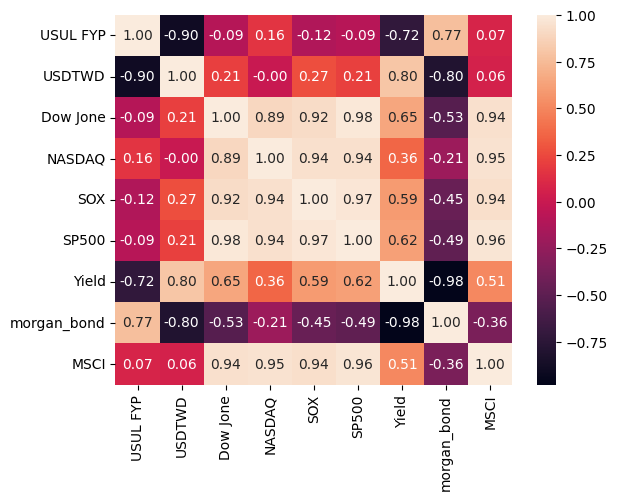

In [14]:
import seaborn as sns#correlation of every feature
corr = data.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

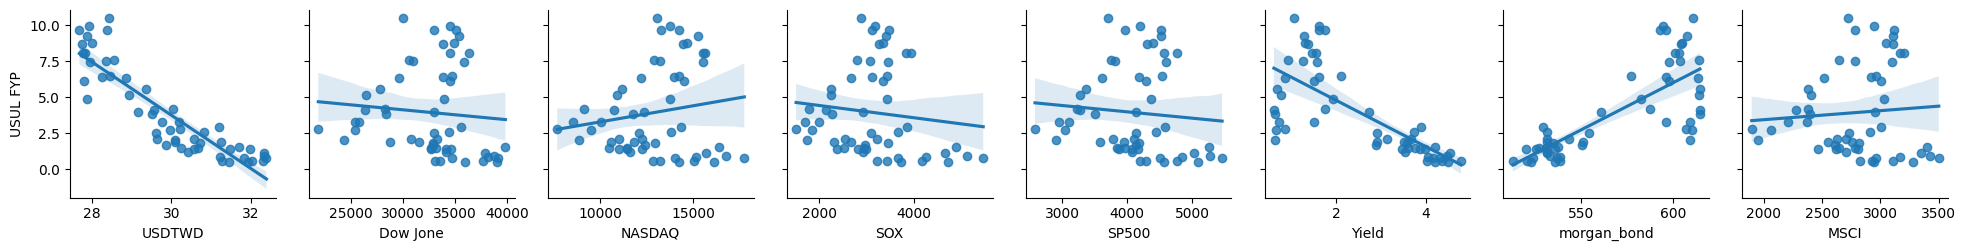

In [15]:
import matplotlib.pyplot as plt
sns.pairplot(data,x_vars=data.columns[1:],y_vars=data.columns[0],kind="reg")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler#data normalized
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm,index=data.index,columns=data.columns)
data_norm

,USUL FYP,USDTWD,Dow Jone,NASDAQ,SOX,SP500,Yield,morgan_bond,MSCI
YM,,,,,,,,,
202001,0.078377,0.102053,-1.112878,-1.709908,-1.563455,-1.403308,-0.559433,0.535206,-1.149507
202002,-0.209450,0.200032,-1.823411,-1.975081,-1.660601,-1.835723,-0.741380,0.772477,-1.186938
202003,-0.366447,0.209760,-2.695070,-2.369166,-1.884935,-2.424863,-1.218402,1.079398,-2.497206
202004,-0.628109,0.131672,-2.088898,-1.828683,-1.631020,-1.902331,-1.367663,1.137098,-2.341205
202005,-0.405696,0.042537,-1.829964,-1.555899,-1.491401,-1.692132,-1.356185,1.158836,-2.048717
202006,-0.206180,-0.096164,-1.722692,-1.297396,-1.325769,-1.602908,-1.312723,1.141562,-1.629006
202007,0.058753,-0.223188,-1.569078,-0.985448,-1.164626,-1.330628,-1.392663,1.281301,-1.433709
202008,-0.042641,-0.251684,-1.069443,-0.517332,-1.021900,-0.965330,-1.372428,1.280894,-1.122841
202009,0.529743,-0.360463,-1.231272,-0.793506,-1.040661,-1.184184,-1.349270,1.284980,-1.158638


In [17]:
x = data_norm.iloc[:,1:]
y = data_norm.iloc[:,0]

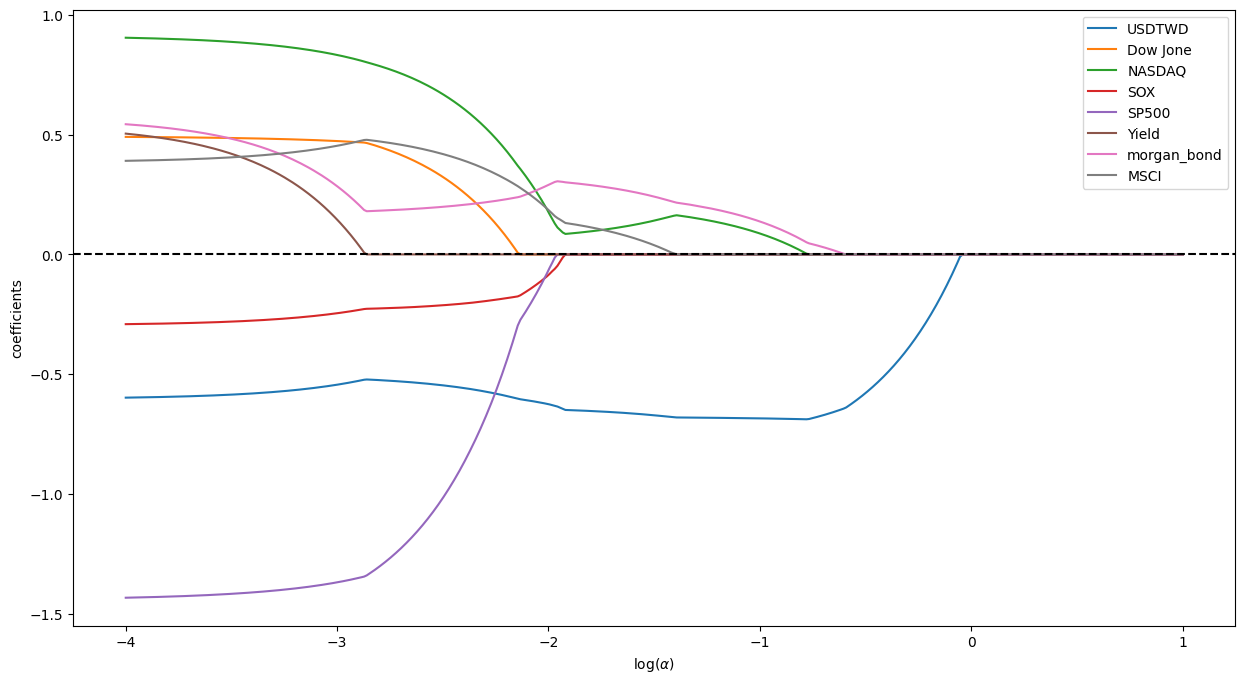

In [18]:
from sklearn.linear_model import Lasso#to do feature selection and show the changed of the coefficients of each feature corresponding to different alphas
alphas = [10**i for i in np.linspace(-4,1,400)]
coefs = []
for alpha in alphas:
    reg = Lasso(alpha = alpha)
    reg.fit(x,y)
    coefs.append(reg.coef_)
log_alphas = np.log10(alphas)
plt.figure(figsize=(15,8))
plt.plot(log_alphas,coefs)
plt.axhline(y=0,color="black",ls='--')
plt.xlabel(r"log($\alpha$)")
plt.ylabel("coefficients")
plt.legend(data.drop("USUL FYP",axis=1).columns)
plt.show()

alpha =  0.04001135420077963
selected features :  ['USDTWD' 'NASDAQ' 'morgan_bond']
coef =  [-0.68081636  0.          0.16389013  0.          0.          0.
  0.21635718  0.        ]
BIC =  65.03228805466128
MSE =  0.1554102545896947
score =  0.8445897454103053


C:\Users\User\AppData\Local\Temp\ipykernel_15880\1494995841.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(alpha_min,BIC_min-5,"(%.2f,%.2f)"%(alpha_min,BIC_min),color='red')


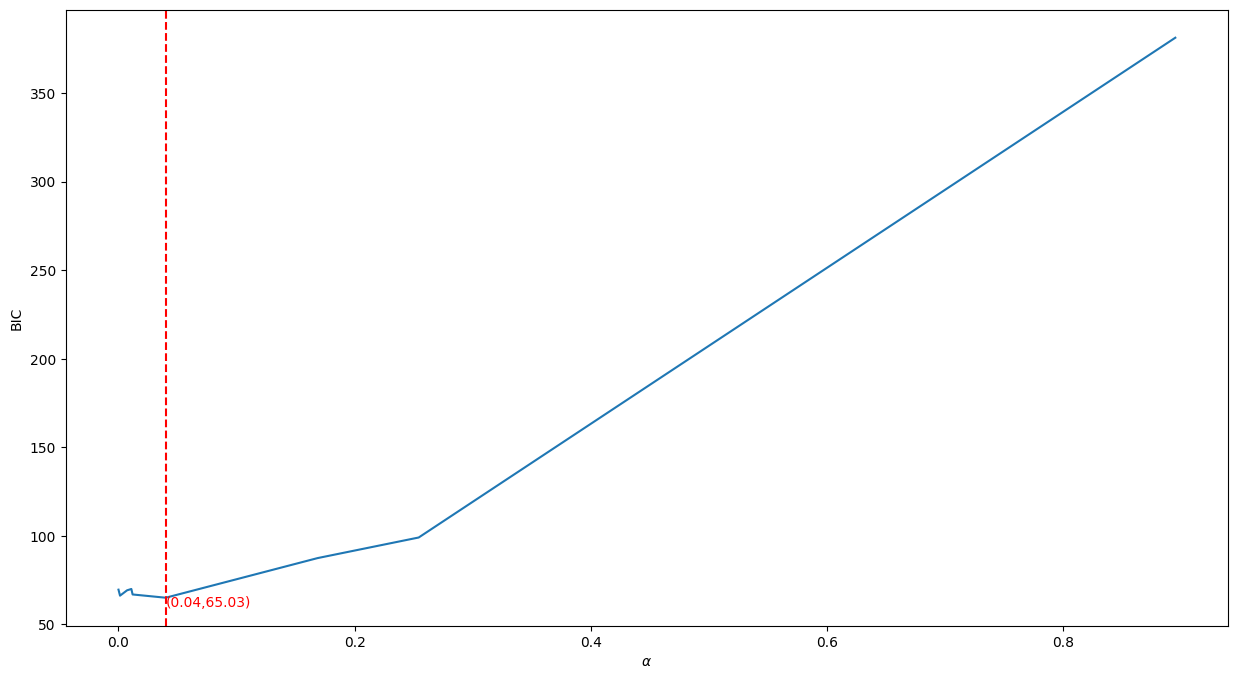

In [19]:
from sklearn.linear_model import LassoLarsIC#choose the best Lasso model by BIC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
reg = LassoLarsIC(criterion="bic")
reg.fit(x,y)
y_pred = reg.predict(x)
print("alpha = ",reg.alpha_)
print("selected features : ",x.columns[reg.coef_.astype(bool)].values)
print("coef = ",reg.coef_)
print("BIC = ",reg.criterion_.min())
print("MSE = ",mean_squared_error(y,y_pred))
print("score = ",reg.score(x,y))
BIC_min = reg.criterion_.min()
idx = np.where(reg.criterion_ == reg.criterion_.min())[0]
alpha_min = reg.alphas_[idx]
plt.figure(figsize=(15,8))
plt.plot(reg.alphas_,reg.criterion_)
plt.axvline(alpha_min,color="red",ls="--")
plt.text(alpha_min,BIC_min-5,"(%.2f,%.2f)"%(alpha_min,BIC_min),color='red')
plt.xlabel(r'$\alpha$')
plt.ylabel('BIC')
plt.show()

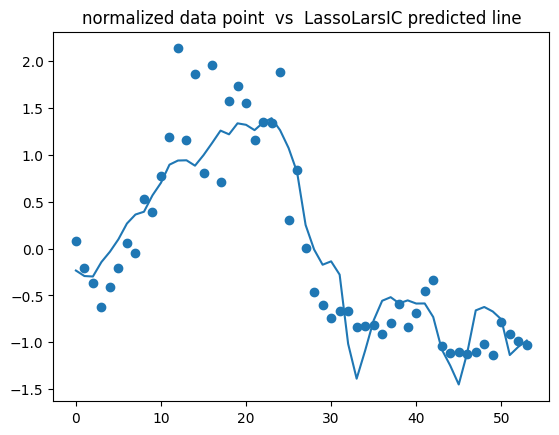

In [20]:
plt.scatter(range(x.shape[0]),y)#visualized the normalized data and predicted line
plt.plot(y_pred)
plt.title("normalized data point  vs  LassoLarsIC predicted line")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor#to do feature selection using Random Forest Regressor
from sklearn.feature_selection import SequentialFeatureSelector
rfr = RandomForestRegressor(random_state=42)
sfs = SequentialFeatureSelector(rfr)
sfs.fit(x,y)
print("selected feature : ",x.columns[sfs.get_support()].values)

selected feature :  ['USDTWD' 'Dow Jone' 'Yield' 'MSCI']


feature importance :            importance
USDTWD      0.856258
Dow Jone    0.031000
Yield       0.083247
MSCI        0.029496
MSE =  0.01887346096446826
score =  0.9811265390355317


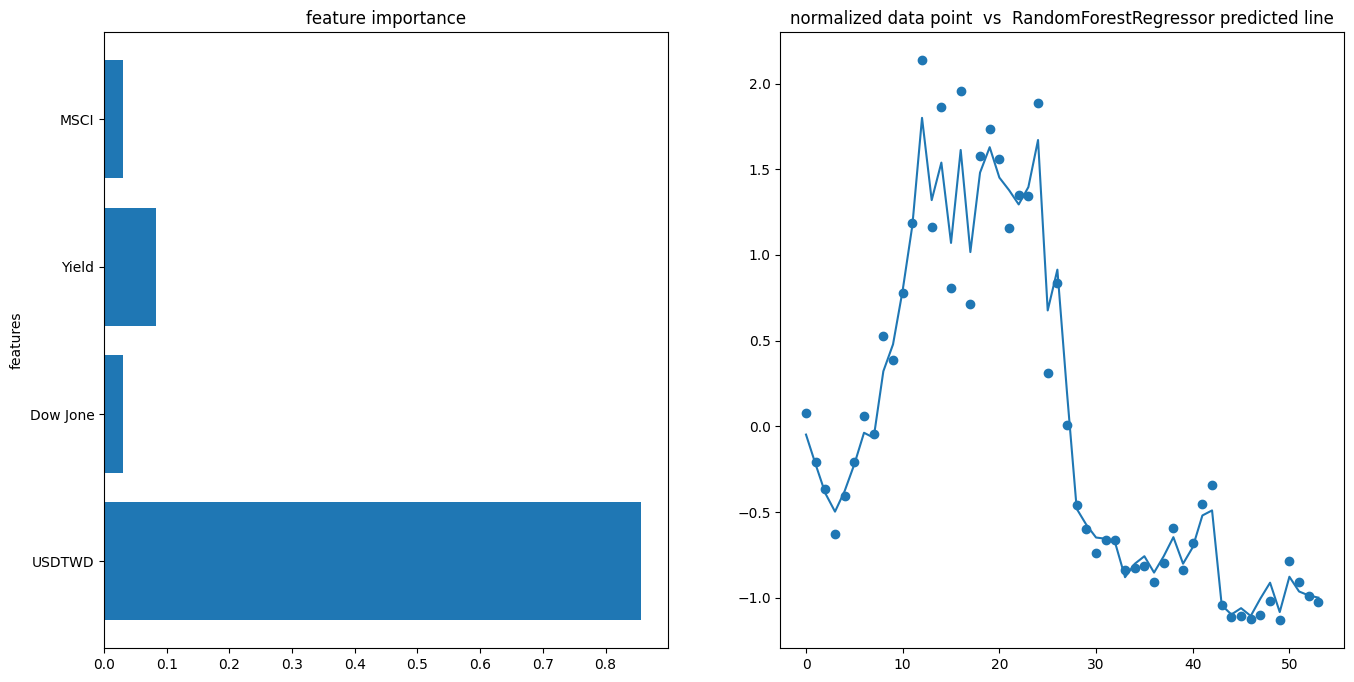

In [22]:
x_sel = sfs.transform(x)#construct model after select importance features
reg = RandomForestRegressor(random_state=42)
reg.fit(x_sel,y)
y_pred = reg.predict(x_sel)
importances = reg.feature_importances_
importances = pd.DataFrame(importances,index=x.columns[sfs.get_support()],columns=['importance'])
print("feature importance : ",importances)
print("MSE = ",mean_squared_error(y,y_pred))
print("score = ",r2_score(y,y_pred))
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.barh(range(4),reg.feature_importances_,tick_label = x.columns[sfs.get_support()])
ax1.set_ylabel("features")
ax1.set_title("feature importance")
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(range(x.shape[0]),y)
ax2.plot(y_pred)
ax2.set_title("normalized data point  vs  RandomForestRegressor predicted line")
plt.show()